In [38]:
import requests
import json
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats
portlanddata = "D:\\/portlandcrime.csv"
portlandcrimedf = pd.read_csv(portlanddata, low_memory=False)
portlandcrimedf.head()

,Address,Case Number,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Month Year,Occur Time,Offense Category,Offense Count,Offense Type,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,Report Date,ReportMonthYear
0,8400 BLOCK OF SE LAMBERT ST,15-159999,Property,Lents,1,1/1/2015,1/1/2015,1220,Larceny Offenses,1,Theft From Building,45.466868,-122.576147,7669522.0,663149.0,5/15/2015,May-15
1,1200 BLOCK OF SW COLUMBIA ST,15-384156,Property,Downtown,1,1/1/2015,1/1/2015,1200,Fraud Offenses,1,Identity Theft,45.515990,-122.687212,7641523.0,681804.0,11/5/2015,Nov-15
2,NaN,15-X4450445,Property,Hazelwood,1,1/1/2015,1/1/2015,1,Fraud Offenses,1,Identity Theft,NaN,NaN,NaN,NaN,11/30/2015,Nov-15
3,NaN,18-X5023636,Person,Mill Park,1,1/1/2015,1/1/2015,0,Assault Offenses,1,Aggravated Assault,NaN,NaN,NaN,NaN,1/24/2018,Jan-18
4,3200 BLOCK OF NE 73RD AVE,15-267913,Property,Roseway,1,1/1/2015,1/1/2015,800,Burglary,1,Burglary,45.545949,-122.587994,7667229.0,692051.0,8/6/2015,Aug-15


In [39]:
moondata = "D:\\moonphases.csv"
moondf = pd.read_csv(moondata)
moondf.head()

,Year,Day,Month,Date,Percent Illumination,Moon Phase
0,2015,1,1,1/1/2015,84.00%,Waxing gibbous
1,2015,2,1,1/2/2015,91.00%,Waxing gibbous
2,2015,3,1,1/3/2015,96.00%,Waxing gibbous
3,2015,4,1,1/4/2015,99.00%,Waxing gibbous
4,2015,5,1,1/5/2015,100.00%,Full Moon


In [40]:
mergedf = pd.merge(moondf, portlandcrimedf, how="outer", left_on='Date', right_on='Occur Date')
mergedf.head()
    
    
    

,Year,Day,Month,Date,Percent Illumination,Moon Phase,Address,Case Number,Crime Against,Neighborhood,...,Occur Time,Offense Category,Offense Count,Offense Type,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,Report Date,ReportMonthYear
0,2015,1,1,1/1/2015,84.00%,Waxing gibbous,8400 BLOCK OF SE LAMBERT ST,15-159999,Property,Lents,...,1220.0,Larceny Offenses,1.0,Theft From Building,45.466868,-122.576147,7669522.0,663149.0,5/15/2015,May-15
1,2015,1,1,1/1/2015,84.00%,Waxing gibbous,1200 BLOCK OF SW COLUMBIA ST,15-384156,Property,Downtown,...,1200.0,Fraud Offenses,1.0,Identity Theft,45.515990,-122.687212,7641523.0,681804.0,11/5/2015,Nov-15
2,2015,1,1,1/1/2015,84.00%,Waxing gibbous,NaN,15-X4450445,Property,Hazelwood,...,1.0,Fraud Offenses,1.0,Identity Theft,NaN,NaN,NaN,NaN,11/30/2015,Nov-15
3,2015,1,1,1/1/2015,84.00%,Waxing gibbous,NaN,18-X5023636,Person,Mill Park,...,0.0,Assault Offenses,1.0,Aggravated Assault,NaN,NaN,NaN,NaN,1/24/2018,Jan-18
4,2015,1,1,1/1/2015,84.00%,Waxing gibbous,3200 BLOCK OF NE 73RD AVE,15-267913,Property,Roseway,...,800.0,Burglary,1.0,Burglary,45.545949,-122.587994,7667229.0,692051.0,8/6/2015,Aug-15


In [41]:
mergedf.columns

Index(['Year', 'Day', 'Month', 'Date', 'Percent Illumination', 'Moon Phase',
       'Address', 'Case Number', 'Crime Against', 'Neighborhood',
       'Number of Records', 'Occur Date', 'Occur Month Year', 'Occur Time',
       'Offense Category', 'Offense Count', 'Offense Type', 'OpenDataLat',
       'OpenDataLon', 'OpenDataX', 'OpenDataY', 'Report Date',
       'ReportMonthYear'],
      dtype='object')

In [42]:
mergedfclean = mergedf
mergedfclean.drop(labels=['Case Number', 'Crime Against', 'Number of Records', 'Occur Month Year', 'Offense Count', 'Offense Type', 'OpenDataX', 'OpenDataY', 'Report Date', 'Year', 'Day', 'Month', 'ReportMonthYear'], axis=1, inplace=True)
mergedfclean

,Date,Percent Illumination,Moon Phase,Address,Neighborhood,Occur Date,Occur Time,Offense Category,OpenDataLat,OpenDataLon
0,1/1/2015,84.00%,Waxing gibbous,8400 BLOCK OF SE LAMBERT ST,Lents,1/1/2015,1220.0,Larceny Offenses,45.466868,-122.576147
1,1/1/2015,84.00%,Waxing gibbous,1200 BLOCK OF SW COLUMBIA ST,Downtown,1/1/2015,1200.0,Fraud Offenses,45.515990,-122.687212
2,1/1/2015,84.00%,Waxing gibbous,NaN,Hazelwood,1/1/2015,1.0,Fraud Offenses,NaN,NaN
3,1/1/2015,84.00%,Waxing gibbous,NaN,Mill Park,1/1/2015,0.0,Assault Offenses,NaN,NaN
4,1/1/2015,84.00%,Waxing gibbous,3200 BLOCK OF NE 73RD AVE,Roseway,1/1/2015,800.0,Burglary,45.545949,-122.587994
5,1/1/2015,84.00%,Waxing gibbous,5700 BLOCK OF N SYRACUSE ST,University Park,1/1/2015,0.0,Fraud Offenses,45.580738,-122.729461
6,1/1/2015,84.00%,Waxing gibbous,NaN,Pearl,1/1/2015,800.0,Fraud Offenses,NaN,NaN
7,1/1/2015,84.00%,Waxing gibbous,3700 BLOCK OF SE 10TH AVE,Brooklyn,1/1/2015,1.0,Fraud Offenses,45.495667,-122.655891
8,1/1/2015,84.00%,Waxing gibbous,NaN,Humboldt,1/1/2015,1.0,Assault Offenses,NaN,NaN
9,1/1/2015,84.00%,Waxing gibbous,100 BLOCK OF NW 20TH PL,Northwest,1/1/2015,1.0,Larceny Offenses,45.524034,-122.693272


In [43]:
# Change date formatting
mergedfclean['Date'] = mergedfclean['Date'].apply(lambda x : dt.datetime.strptime(x, '%m/%d/%Y'))
mergedfclean

,Date,Percent Illumination,Moon Phase,Address,Neighborhood,Occur Date,Occur Time,Offense Category,OpenDataLat,OpenDataLon
0,2015-01-01,84.00%,Waxing gibbous,8400 BLOCK OF SE LAMBERT ST,Lents,1/1/2015,1220.0,Larceny Offenses,45.466868,-122.576147
1,2015-01-01,84.00%,Waxing gibbous,1200 BLOCK OF SW COLUMBIA ST,Downtown,1/1/2015,1200.0,Fraud Offenses,45.515990,-122.687212
2,2015-01-01,84.00%,Waxing gibbous,NaN,Hazelwood,1/1/2015,1.0,Fraud Offenses,NaN,NaN
3,2015-01-01,84.00%,Waxing gibbous,NaN,Mill Park,1/1/2015,0.0,Assault Offenses,NaN,NaN
4,2015-01-01,84.00%,Waxing gibbous,3200 BLOCK OF NE 73RD AVE,Roseway,1/1/2015,800.0,Burglary,45.545949,-122.587994
5,2015-01-01,84.00%,Waxing gibbous,5700 BLOCK OF N SYRACUSE ST,University Park,1/1/2015,0.0,Fraud Offenses,45.580738,-122.729461
6,2015-01-01,84.00%,Waxing gibbous,NaN,Pearl,1/1/2015,800.0,Fraud Offenses,NaN,NaN
7,2015-01-01,84.00%,Waxing gibbous,3700 BLOCK OF SE 10TH AVE,Brooklyn,1/1/2015,1.0,Fraud Offenses,45.495667,-122.655891
8,2015-01-01,84.00%,Waxing gibbous,NaN,Humboldt,1/1/2015,1.0,Assault Offenses,NaN,NaN
9,2015-01-01,84.00%,Waxing gibbous,100 BLOCK OF NW 20TH PL,Northwest,1/1/2015,1.0,Larceny Offenses,45.524034,-122.693272


In [44]:
#Create an overview table that summarizes key metrics about each date, including: 

# Total crime by date
portlandcrimetotal = pd.DataFrame(mergedfclean.Date.value_counts())

# Rename Date column to Total Crimes
portlandcrimetotalrename = portlandcrimetotal.rename(columns={'Date': 'Total Crimes'})

# Add index title for Total Crime
portlandcrimetotalrename.index.name = 'Date'

# Merge crime counts with previous total data frame
portlandcrimetot = mergedfclean.merge(portlandcrimetotalrename, how='outer', on='Date').drop(['Occur Time', 'Occur Date', 'Address', 'Offense Category', 'OpenDataLat', 'OpenDataLon', 'Moon Phase', 'Neighborhood'], axis=1)

# Remove duplicate dates/condense
portlandcrimetotrm = portlandcrimetot.drop_duplicates()

# Sort data frame by date
portlandbydate = portlandcrimetotrm.sort_values(by='Date')

# Reset index values
portlandsummary = portlandbydate.reset_index(drop=True)

portlandsummary

,Date,Percent Illumination,Total Crimes
0,2015-01-01,84.00%,44
1,2015-01-02,91.00%,1
2,2015-01-03,96.00%,1
3,2015-01-04,99.00%,3
4,2015-01-05,100.00%,3
5,2015-01-06,99.00%,3
6,2015-01-07,96.00%,2
7,2015-01-08,91.00%,1
8,2015-01-09,85.00%,1
9,2015-01-10,78.00%,1


In [45]:
portlandsummary['Percent Illumination'] = portlandsummary['Percent Illumination'].str.rstrip('%').astype('float')

In [46]:
# Create percent illumination bins
bins = [0, 3, 10, 21.5, 35.5, 51, 66, 79, 90, 97, 100]
group_name = ['0-2.99%', '3-9.99%', '10-21.49%', '21.5-35.49%', '35.5-50.99%', '51-65.99%', '66-78.99%', '79-89.99%', '90-96.99%', '97-100%']
portlandsummary['% Illumination'] = pd.cut(portlandsummary['Percent Illumination'], bins, labels = group_name, include_lowest=True)

# Group the merged data by school spending
by_illumination = portlandsummary.groupby('% Illumination')

# Calculate average crime
avg_crime = by_illumination['Total Crimes'].mean()

# Store illumination bins in a dataframe            
portlandsummarynew = pd.DataFrame({'Average Crime': avg_crime})

portlandsummarynew

,Average Crime
% Illumination,
0-2.99%,145.820312
3-9.99%,145.914894
10-21.49%,144.196262
21.5-35.49%,143.587156
35.5-50.99%,145.119658
51-65.99%,140.822430
66-78.99%,141.084906
79-89.99%,146.054054
90-96.99%,138.629630


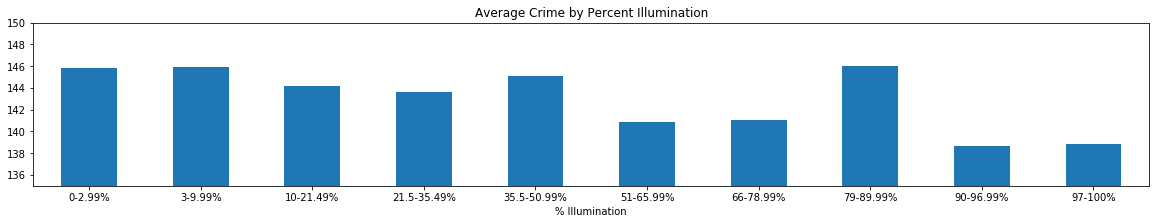

In [69]:
# Use DataFrame.plot() in order to create a bar chart of the data
portlandsummarynew.plot(kind="bar", figsize=(20,3), title='Average Crime by Percent Illumination', legend=False, 
                    ylim=(135, 150), rot=0)

# Save plot
plt.savefig("portlandaveragecrime.png")

# Show plot
plt.show()


In [109]:
# Export data to csv
portlandsummary.to_csv('D:\\/portlanddata.csv')


In [49]:
# Calculate average crime
portlandcrimetotal = portlandcrimetotalrename['Total Crimes'].mean()
print(portlandcrimetotal)

# Print daily summary data frame
portlandcrimetotalrename

143.04835766423358


,Total Crimes
Date,
2016-11-10,285
2015-10-31,232
2017-12-01,228
2016-07-01,227
2017-09-01,222
2017-02-28,219
2017-05-01,216
2015-11-21,215
2017-12-15,213


In [50]:
stats.ttest_1samp(portlandcrimetotalrename['Total Crimes'],portlandcrimetotal)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [60]:
portlandfullmoon = portlandsummary.loc[portlandsummary['Percent Illumination'] >= 97.0, :]
portlandfullmoon.drop(['% Illumination'], axis=1)

,Date,Percent Illumination,Total Crimes
3,2015-01-04,99.0,3
4,2015-01-05,100.0,3
5,2015-01-06,99.0,3
32,2015-02-02,97.0,4
33,2015-02-03,99.0,1
34,2015-02-04,100.0,1
35,2015-02-05,98.0,3
62,2015-03-04,98.0,4
63,2015-03-05,100.0,3
64,2015-03-06,100.0,5


In [61]:
stats.ttest_1samp(portlandfullmoon['Total Crimes'], portlandcrimetotal)

Ttest_1sampResult(statistic=-0.7608315710084188, pvalue=0.4481791672164058)

In [138]:
# New bins for groups
group_name2 = ['0-2.99', '3-9.99', '10-21.49', '21.5-35.49', '35.5-50.99', '51-65.99', '66-78.99', '79-89.99', '90-96.99', '97-100']
portlandsummary['% Illumination'] = pd.cut(portlandsummary['Percent Illumination'], 
                                      bins, 
                                      labels = group_name2, 
                                      include_lowest=True)
# Get total of data
print(len(portlandsummary))
# Display Data Frame
portlandsummary.head()

1096


,Date,Percent Illumination,Total Crimes,% Illumination
0,2015-01-01,84.0,44,79-89.99
1,2015-01-02,91.0,1,90-96.99
2,2015-01-03,96.0,1,90-96.99
3,2015-01-04,99.0,3,97-100
4,2015-01-05,100.0,3,97-100


In [133]:
# Extract individual groups
group1 = portlandsummary[portlandsummary["% Illumination"] == "0-2.99"]["Total Crimes"]
group2 = portlandsummary[portlandsummary["% Illumination"] == "3-9.99"]["Total Crimes"]
group3 = portlandsummary[portlandsummary["% Illumination"] == "10-21.49"]["Total Crimes"]
group4 = portlandsummary[portlandsummary["% Illumination"] == "21.5-35.49"]["Total Crimes"]
group5 = portlandsummary[portlandsummary["% Illumination"] == "35.5-50.99"]["Total Crimes"]
group6 = portlandsummary[portlandsummary["% Illumination"] == "51-65.99"]["Total Crimes"]
group7 = portlandsummary[portlandsummary["% Illumination"] == "66-78.99"]["Total Crimes"]
group8 = portlandsummary[portlandsummary["% Illumination"] == "79-89.99"]["Total Crimes"]
group9 = portlandsummary[portlandsummary["% Illumination"] == "90-96.99"]["Total Crimes"]
group10 = portlandsummary[portlandsummary["% Illumination"] == "97-100"]["Total Crimes"]

In [134]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

F_onewayResult(statistic=0.3424071177559582, pvalue=0.9607368069727593)

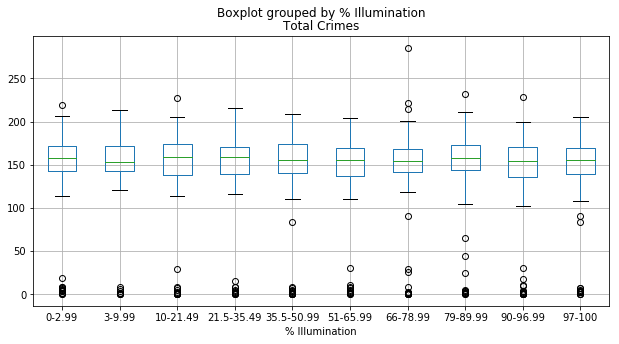

In [139]:
# Create a boxplot to compare means
portlandsummary.boxplot('Total Crimes', by='% Illumination', figsize=(10, 5))
# Save plot
plt.savefig("portland_total_crimes_box.png")
plt.show()


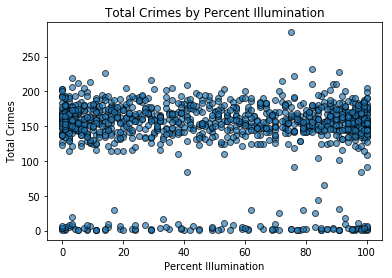

In [137]:
# Scatter plots for total crimes by percent illumination
plt.scatter(portlandsummary['Percent Illumination'], portlandsummary['Total Crimes'],
           marker ='o', edgecolors='black', alpha = 0.65, linewidth = 1)
plt.title('Total Crimes by Percent Illumination')
plt.xlabel('Percent Illumination')
plt.ylabel('Total Crimes')
# Save plot
plt.savefig("portland_total_crimes_scatter.png")
plt.show()